<a href="https://colab.research.google.com/github/mluanastevensc/100DayOfCode/blob/main/Cash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:


df = pd.read_excel('QuiltData.xlsx', index_col = 'Year',parse_dates = True,sheet_name="Cash")

In [7]:
df.head(5)

,Cash
Year,
2000-01-01,6.2
2001-01-01,4.4
2002-01-01,1.8
2003-01-01,1.1
2004-01-01,1.3


In [8]:
df.tail()

,Cash
Year,
2016-01-01,0.3
2017-01-01,0.8
2018-01-01,1.8
2019-01-01,2.2
2020-01-01,0.3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2000-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cash    21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [10]:
df.index.freq='YS'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2000-01-01 to 2020-01-01
Freq: AS-JAN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cash    21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


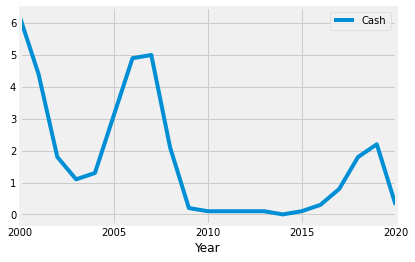

In [12]:
df.plot()

In [13]:
train = df.iloc[:15]

In [14]:
test = df.iloc[15:]

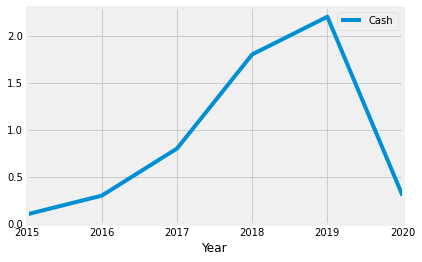

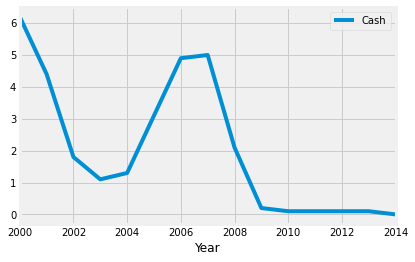

In [15]:
test.plot()
train.plot()

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
model = ExponentialSmoothing(train['Cash'],trend='add',seasonal ='add', seasonal_periods = 6).fit()

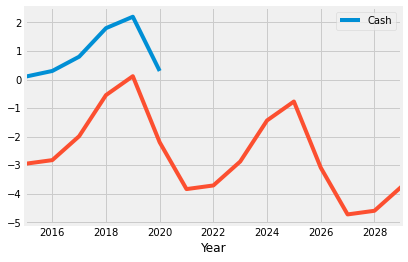

In [34]:
test.plot()
model.forecast(15).plot()

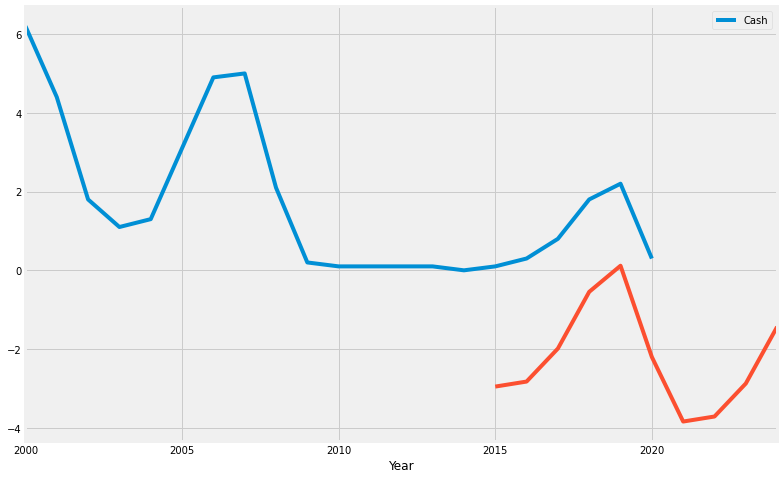

In [35]:
df.plot(figsize=(12,8))
model.forecast(10).plot()